<a href="https://colab.research.google.com/github/sakurasakura1996/Pytorch-start-learning/blob/master/pytorch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!nvidia-smi

Wed Mar 18 07:21:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    24W /  75W |   1067MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

In [73]:
mnist_train = torchvision.datasets.FashionMNIST(root='~/Dataset/FashionMNIST',train=True,download=True,transform=transforms.Compose([
  transforms.Resize(96),
  transforms.ToTensor()
]))
mnist_test = torchvision.datasets.FashionMNIST(root='~/Dataset/FashionMNIST',train=False,download=True,transform=transforms.Compose([
  transforms.Resize(96),
  transforms.ToTensor()
]))
print(type(mnist_train),type(mnist_test))
print(len(mnist_train),len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'> <class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [74]:
# 可以用索引来访问数据集具体数据
feature, label = mnist_train[0]
print(feature.shape, label)

torch.Size([1, 96, 96]) 9


In [0]:
from PIL import Image

# loader使用torchvision中自带的transforms函数
loader = transforms.Compose([
    transforms.ToTensor()])  

unloader = transforms.ToPILImage()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)  # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

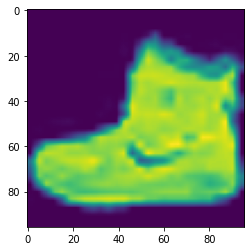

In [76]:
imshow(feature)

In [0]:
# 输入tensor变量
# 输出PIL格式图片
def tensor_to_PIL(tensor):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    return image

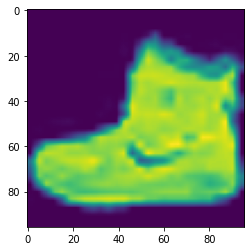

In [78]:
plt.imshow(tensor_to_PIL(feature))
plt.show()

In [0]:
# 读取小批量
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=4)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=4)

In [0]:
import torchvision.models as models

In [81]:
net = models.vgg11(pretrained=True)
print(net)
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
num_epochs = 10


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [0]:
class FlattenLayer(nn.Module):
	def __init__(self):
		super(FlattenLayer, self).__init__()
	def forward(self, x):   # x shape: (batch, *, *, ...)
		return x.view(x.shape[0], -1)

In [83]:
import torch.nn as nn
net_features = net.features
print(net_features[0])
net_features[0] = nn.Conv2d(1, 8, kernel_size=(3, 3), stride=(1,1), padding=(1,1))
net_features[3] = nn.Conv2d(8, 16, kernel_size=(3,3),stride=(1,1),padding=(1,1))
net_features[6] = nn.Conv2d(16, 32, kernel_size=(3,3),stride=(1,1),padding=(1,1))
net_features[8] = nn.Conv2d(32, 32, kernel_size=(3,3),stride=(1,1),padding=(1,1))
net_features[11] = nn.Conv2d(32, 64, kernel_size=(3,3),stride=(1,1),padding=(1,1))
net_features[13] = nn.Conv2d(64, 64, kernel_size=(3,3),stride=(1,1),padding=(1,1))
net_features[16] = nn.Conv2d(64, 64, kernel_size=(3,3),stride=(1,1),padding=(1,1))
net_features[18] = nn.Conv2d(64, 64, kernel_size=(3,3),stride=(1,1),padding=(1,1))
print(net.features)
net_classifier = net.classifier
print(net_classifier[6])
net_classifier[6] = nn.Linear(4096, 10, bias=True)
print(net_classifier[6])
net.classifier = nn.Sequential(
   
    nn.Linear(512*7*7,4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096,10)
)
print(net.classifier)

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace=True)
  (13): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace=True)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False

In [84]:
net.avgpool = nn.Sequential(
     FlattenLayer()
)
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Co

In [0]:
def train_ch5(net, train_iter, test_iter, batch_size, optimizer,device, num_epochs):
	net = net.to(device)
	print("training on ", device)
	loss = torch.nn.CrossEntropyLoss()
	batch_count = 0
	for epoch in range(num_epochs):
		train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0,time.time()
		for X, y in train_iter:
			X = X.to(device)
			y = y.to(device)
			y_hat = net(X)
			l = loss(y_hat, y)
			optimizer.zero_grad()
			l.backward()
			optimizer.step()
			train_l_sum += l.cpu().item()
			train_acc_sum += (y_hat.argmax(dim=1) ==y).sum().cpu().item()
			n += y.shape[0]
			batch_count += 1
		test_acc = evaluate_accuracy(test_iter, net)
		print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f,time %.1f sec'% (epoch + 1, train_l_sum / batch_count,train_acc_sum / n, test_acc, time.time() - start))

In [86]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_ch5(net,train_iter,test_iter,batch_size=batch_size,optimizer=optimizer,device=device,num_epochs=num_epochs)

training on  cuda


RuntimeError: ignored